## Importing packages

In [2]:
import io
import os
from google.colab import drive
drive.mount('/content/drive')
f=io.open('/content/drive/MyDrive/Python/ML/creditcard.csv','r',encoding='utf-8')
data=f.read()
f.close()

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory data analysis

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Python/ML/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

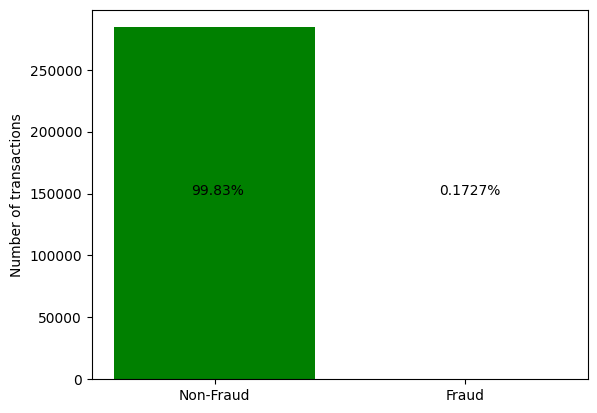

In [7]:
plt.bar(['Non-Fraud','Fraud'], classes, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.show()

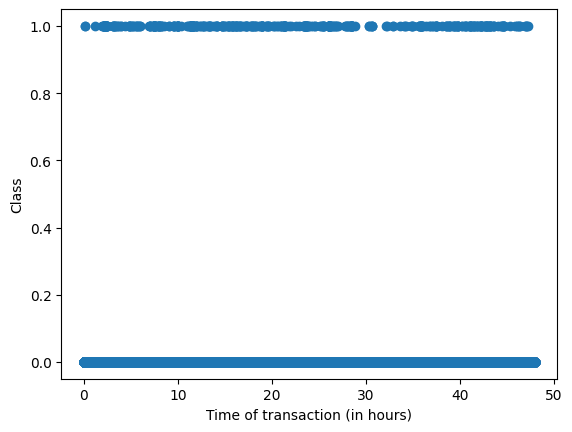

In [8]:
df.Time=df.Time/(60*60)
plt.scatter(df['Time'], df['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')
plt.show()

In [9]:
df.drop('Time', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

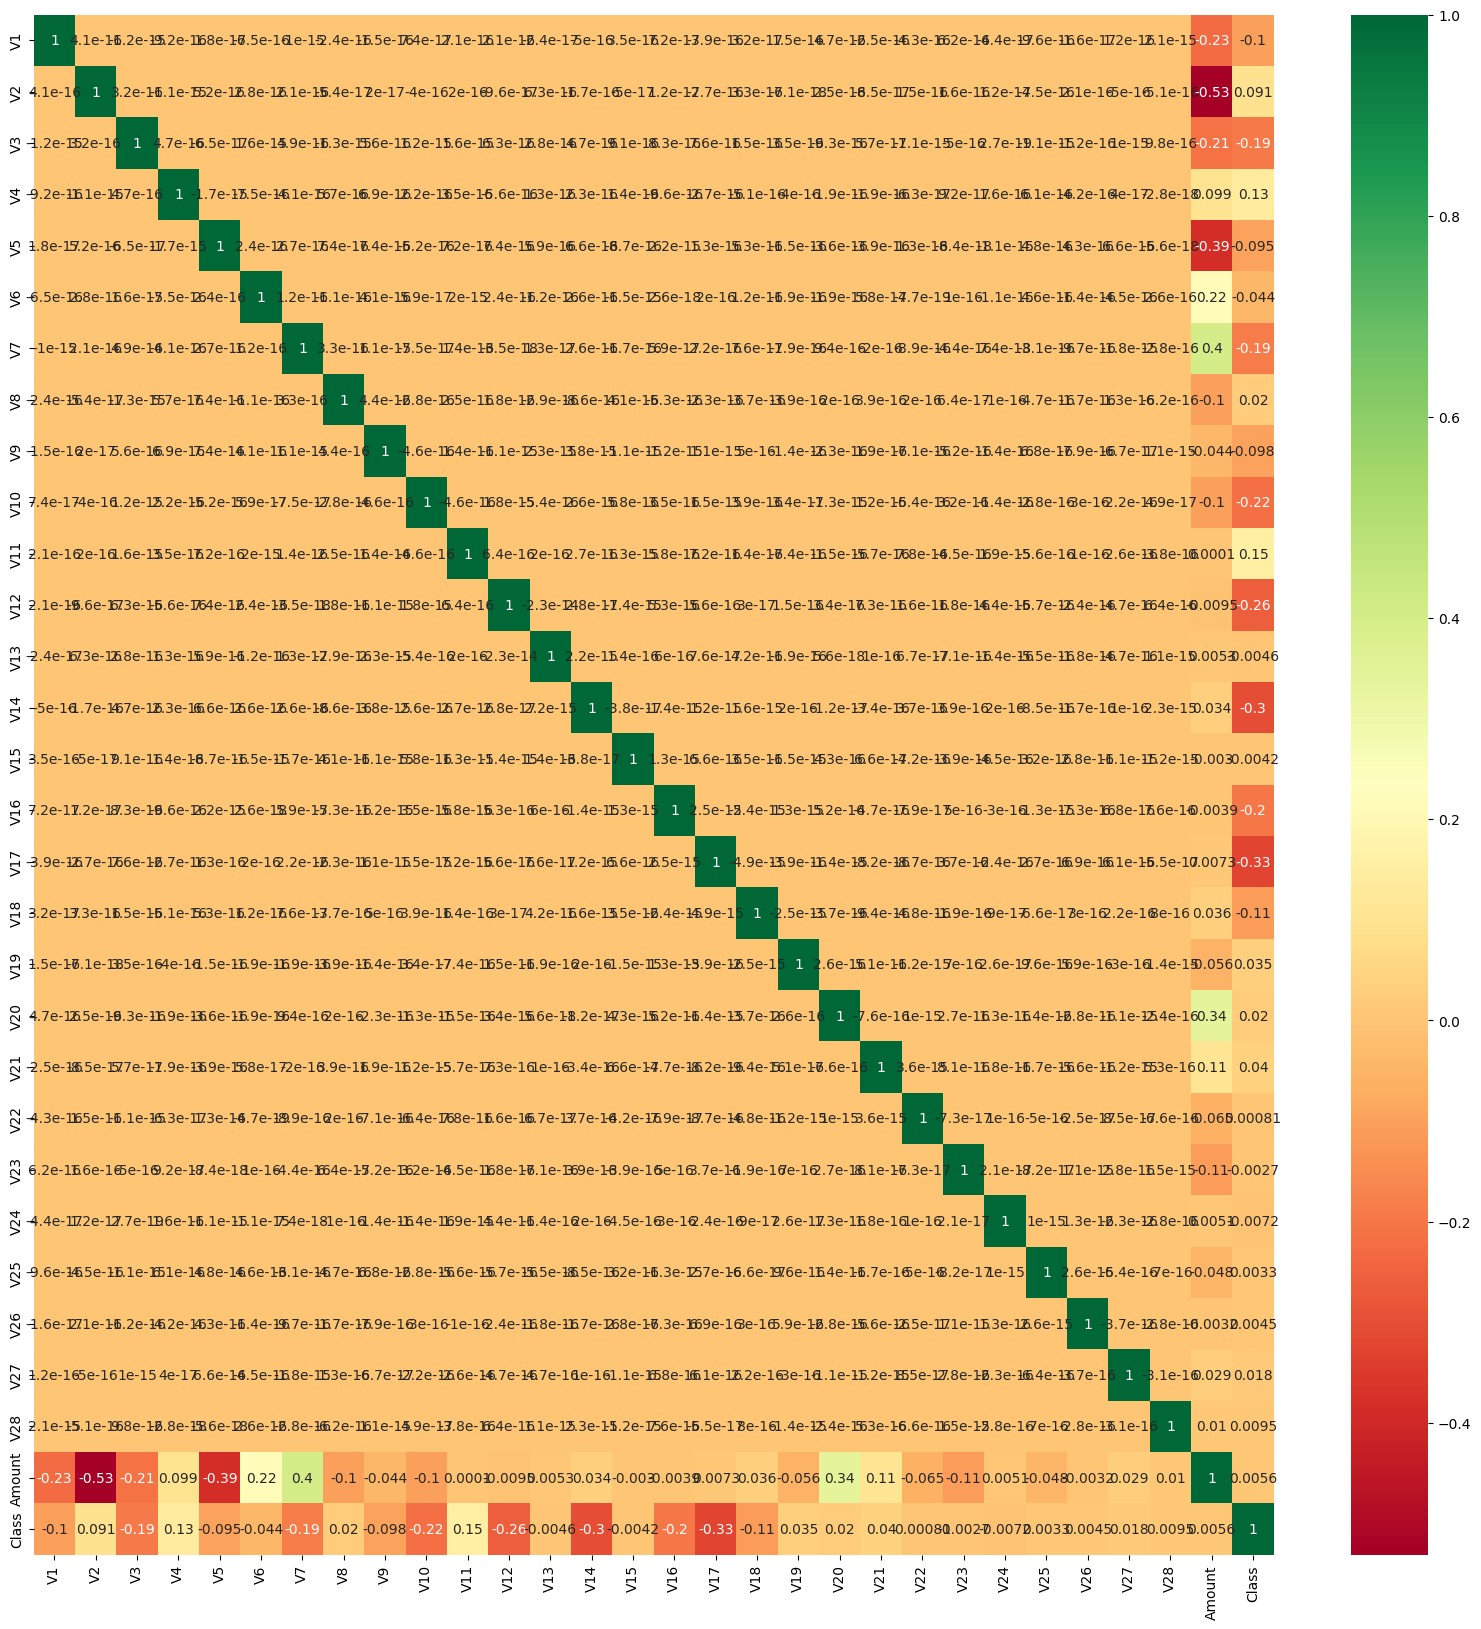

In [10]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df[corrmat.index].corr(),annot=True,cmap="RdYlGn")

In [11]:
y = df['Class']
df.drop('Class', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Splitting the data into train & test data

In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y, stratify=y, random_state=0)

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Plotting the distribution of a variable

(array([ 1.,  0.,  0., ..., 57., 13.,  3.]),
 array([-56.40750963, -56.37995231, -56.35239499, ...,   2.39981535,
          2.42737267,   2.45492999]),
 <BarContainer object of 2136 artists>)

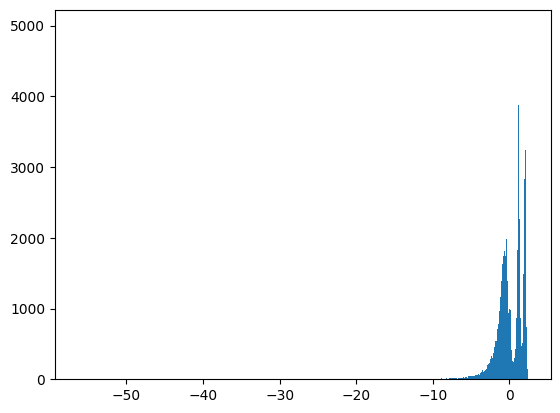

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_train.iloc[:,0], bins=int(X_train.shape[0]/100))

### Handling the skewness of the distribution & making it more gaussian

In [ ]:
from sklearn import preprocessing

pt = preprocessing.PowerTransformer(copy=False)
pt.fit_transform(X_train)
pt.transform(X_test)

from sklearn import metrics

(array([1., 0., 0., ..., 0., 0., 2.]),
 array([-8.50663242, -8.50177547, -8.49691852, ...,  1.85809652,
         1.86295347,  1.86781042]),
 <BarContainer object of 2136 artists>)

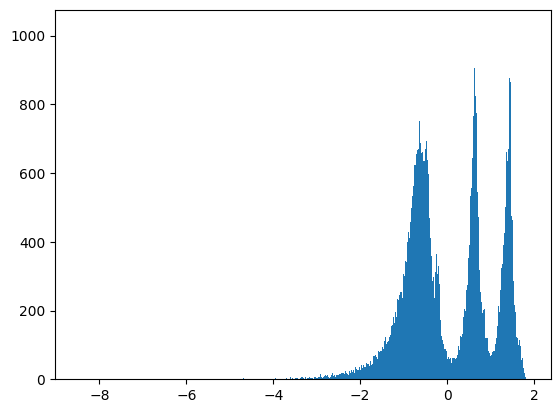

In [ ]:
plt.hist(X_train.iloc[:,0], bins=int(X_train.shape[0]/100))

## Model Building

In [ ]:
num_cv_splits = 3
skf = model_selection.StratifiedKFold(n_splits=num_cv_splits, shuffle=True, random_state=0)

In [ ]:
# Logistic Regression

from sklearn import linear_model

num_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        clf = linear_model.LogisticRegression(C=C_val, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])
# Best C: 0.01
# Best auc corresponding to Best C: 0.9786616229813285

C_val = 0.001 ; auc = 0.9725831226150864 ; cv_num = 0
C_val = 0.01 ; auc = 0.9730252048648035 ; cv_num = 0
C_val = 0.1 ; auc = 0.9721068404707598 ; cv_num = 0
C_val = 1.0 ; auc = 0.9714517809509333 ; cv_num = 0
C_val = 10.0 ; auc = 0.9713672534522162 ; cv_num = 0
C_val = 100.0 ; auc = 0.9713589036451712 ; cv_num = 0
C_val = 1000.0 ; auc = 0.9713579885978239 ; cv_num = 0
C_val = 0.001 ; auc = 0.9935982143766063 ; cv_num = 1
C_val = 0.01 ; auc = 0.9925239487907478 ; cv_num = 1
C_val = 0.1 ; auc = 0.988414013629859 ; cv_num = 1
C_val = 1.0 ; auc = 0.9869018978882652 ; cv_num = 1
C_val = 10.0 ; auc = 0.9867149994675568 ; cv_num = 1
C_val = 100.0 ; auc = 0.9866962409969349 ; cv_num = 1
C_val = 1000.0 ; auc = 0.9866936102358111 ; cv_num = 1
C_val = 0.001 ; auc = 0.9658722571355824 ; cv_num = 2
C_val = 0.01 ; auc = 0.9696692995236884 ; cv_num = 2
C_val = 0.1 ; auc = 0.9705558784955587 ; cv_num = 2
C_val = 1.0 ; auc = 0.9705731502572349 ; cv_num = 2
C_val = 10.0 ; auc = 0.9705587380587501 ; cv

In [ ]:
# kNN

# sklearn.neighbors.KNeighborsClassifier is impractical beyond tens of thousands of samples!
from sklearn import neighbors

num_neighbours = 31
auc = np.zeros((len(range(1, num_neighbours+1, 2)), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for kid, k in enumerate(range(1, num_neighbours+1, 2)):
        clf = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[kid, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('Neighbour =', k, '; auc =', auc[kid, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best neighbour k:', 2*np.argmax(mean_auc)+1)
print('Best auc corresponding to Best neighbour:', mean_auc[np.argmax(mean_auc)])
# Best neighbour k: 31
# Best auc corresponding to Best neighbour: 0.9304018585395948

Neighbour = 1 ; auc = 0.8779573329435232 ; cv_num = 0
Neighbour = 3 ; auc = 0.8942106898805028 ; cv_num = 0
Neighbour = 5 ; auc = 0.9023105746188514 ; cv_num = 0
Neighbour = 7 ; auc = 0.9063314642347453 ; cv_num = 0
Neighbour = 9 ; auc = 0.9062922315797252 ; cv_num = 0
Neighbour = 11 ; auc = 0.9062493387353154 ; cv_num = 0
Neighbour = 13 ; auc = 0.9102954493437223 ; cv_num = 0
Neighbour = 15 ; auc = 0.910251870213802 ; cv_num = 0
Neighbour = 17 ; auc = 0.9102235609364916 ; cv_num = 0
Neighbour = 19 ; auc = 0.9142591485004031 ; cv_num = 0
Neighbour = 21 ; auc = 0.9142311251753887 ; cv_num = 0
Neighbour = 23 ; auc = 0.914213224561655 ; cv_num = 0
Neighbour = 25 ; auc = 0.9141905199493474 ; cv_num = 0
Neighbour = 27 ; auc = 0.9141529458176444 ; cv_num = 0
Neighbour = 29 ; auc = 0.9141030757372106 ; cv_num = 0
Neighbour = 31 ; auc = 0.9181327154933644 ; cv_num = 0
Neighbour = 3 ; auc = 0.9389348299847746 ; cv_num = 1
Neighbour = 5 ; auc = 0.9470312261051113 ; cv_num = 1
Neighbour = 7 ; auc

In [ ]:
# SVM Classifier


from sklearn import svm

num_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        clf = svm.SVC(C=C_val, kernel='rbf', gamma='scale', probability=True, cache_size=200, verbose=True,
                      random_state=0)
        clf.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])
# Best C: 100.0
# Best auc corresponding to Best C: 0.9612837249666456

[LibSVM]C_val = 0.001 ; auc = 0.9413015427583897 ; cv_num = 0
[LibSVM]C_val = 0.01 ; auc = 0.9253956178611294 ; cv_num = 0
[LibSVM]C_val = 0.1 ; auc = 0.9204090673414226 ; cv_num = 0
[LibSVM]C_val = 1.0 ; auc = 0.9305524815683728 ; cv_num = 0
[LibSVM]C_val = 10.0 ; auc = 0.9563910166599239 ; cv_num = 0
[LibSVM]C_val = 100.0 ; auc = 0.9577243550260177 ; cv_num = 0
[LibSVM]C_val = 1000.0 ; auc = 0.9563696846186374 ; cv_num = 0
[LibSVM]C_val = 0.001 ; auc = 0.9577745110587476 ; cv_num = 1
[LibSVM]C_val = 0.01 ; auc = 0.9816578187307219 ; cv_num = 1
[LibSVM]C_val = 0.1 ; auc = 0.9815689447571048 ; cv_num = 1
[LibSVM]C_val = 1.0 ; auc = 0.9732797024083015 ; cv_num = 1
[LibSVM]C_val = 10.0 ; auc = 0.9696837950948201 ; cv_num = 1
[LibSVM]C_val = 100.0 ; auc = 0.9692791154054283 ; cv_num = 1
[LibSVM]C_val = 1000.0 ; auc = 0.9683844278614988 ; cv_num = 1
[LibSVM]C_val = 0.001 ; auc = 0.9532037059023901 ; cv_num = 2
[LibSVM]C_val = 0.01 ; auc = 0.9686557559461185 ; cv_num = 2
[LibSVM]C_val = 0.1

In [ ]:
# Decision Tree

from sklearn import tree

num_depth = range(2, 7)
num_min_samples_leaf = [30,50,100]
num_min_samples_split = [2,31]
auc = np.zeros((len(num_depth)*len(num_min_samples_leaf)*len(num_min_samples_split), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for depth_id, depth in enumerate(num_depth):
        for min_samples_leaf_id, min_samples_leaf in enumerate(num_min_samples_leaf):
            for min_samples_split_id, min_samples_split in enumerate(num_min_samples_split):
                clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                        min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=0)
                clf.fit(X_train_cv, y_train_cv)
                auc_id = depth_id*len(num_min_samples_leaf)*len(num_min_samples_split)+\
                            min_samples_leaf_id*len(num_min_samples_split)+min_samples_split_id
                auc[auc_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('depth =', depth, '; min_samples_leaf =', min_samples_leaf, '; min_samples_split =',
                      min_samples_split, '; auc =', auc[auc_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
depth_id = np.argmax(mean_auc)//(len(num_min_samples_leaf)*len(num_min_samples_split))
min_samples_leaf_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))//len(
                       num_min_samples_split)
min_samples_split_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))%len(
                       num_min_samples_split)
print('Best depth:', num_depth[depth_id])
print('Best min_samples_leaf:', num_min_samples_leaf[min_samples_leaf_id])
print('Best min_samples_split:', num_min_samples_leaf[min_samples_split_id])
print('Best auc corresponding to Best depth, min_samples_leaf & min_samples_split :', mean_auc[np.argmax(mean_auc)])
# Best depth: 5
# Best min_samples_leaf: 30
# Best min_samples_split: 30
# Best auc corresponding to Best depth, min_samples_leaf & min_samples_split : 0.9550467463998019

depth = 2 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.9021015434904276 ; cv_num = 0
depth = 2 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.9021015434904276 ; cv_num = 0
depth = 2 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.9020873030660835 ; cv_num = 0
depth = 2 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.9020873030660835 ; cv_num = 0
depth = 2 ; min_samples_leaf = 100 ; min_samples_split = 2 ; auc = 0.9021027444900711 ; cv_num = 0
depth = 2 ; min_samples_leaf = 100 ; min_samples_split = 31 ; auc = 0.9021027444900711 ; cv_num = 0
depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.93895770616846 ; cv_num = 0
depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.93895770616846 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.938963310833463 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.938963310833463 ; cv_num = 0
depth = 3 ; min_sam

In [ ]:
# Neural Network

import warnings
warnings.filterwarnings("ignore")

import os
import random
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

keep_track = []
cv_num = 0

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
os.environ['PYTHONHASHSEED']='1'

for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    break

model = Sequential()
model.add(Dense(128, input_dim=X_train_cv.shape[1]))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
print(model.summary())

filepath = 'model-{epoch:05d}-{val_loss:.5f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False,
                             save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history = model.fit(X_train_cv, y_train_cv, epochs=10, verbose=1, callbacks=callbacks_list,
                        validation_data=(X_test_cv, y_test_cv))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

None
Epoch 1/10
4444/4451 [============================>.] - ETA: 0s - loss: 0.0063 - binary_accuracy: 0.9990
Epoch 1: saving model to model-00001-0.00407.h5
4451/4451 [==============================] - 18s 4ms/step - loss: 0.0064 - binary_accuracy: 0.9990 - val_loss: 0.0041 - val_binary_accuracy: 0.9992
Epoch 2/10
4449/4451 [============================>.] - ETA: 0s - loss: 0.0031 - binary_accuracy: 0.9994
Epoch 2: saving model to model-00002-0.00411.h5
4451/4451 [==============================] - 14s 3ms/step - loss: 0.0031 - binary_accuracy: 0.9994 - val_loss: 0.0041 - val_binary_accuracy: 0.9993
Epoch 3/10
4443/4451 [============================>.] - ETA: 0s - loss: 0.0026 - binary_accuracy: 0.9994
Epoch 3: saving model to model-00003-0.00380.h5
4451/4451 [==============================] - 17s 4ms/step - loss: 0.0026 - binary_accuracy: 0.9994 - val_loss: 0.0038 - val_binary_accuracy: 0.9993
Epoch 4/10
4450/4451 [============================>.] - ETA: 0s - loss: 0.0026 - binary_accu

In [ ]:
from keras.models import load_model
model = load_model('model-00010-0.00777.h5')
print('Best auc:', metrics.roc_auc_score(y_true = y_test_cv, y_score = model.predict(X_test_cv)))
# Best auc: 0.9585718032506372

2226/2226 [==============================] - 13s 6ms/step
Best auc: 0.9585718032506372


In [ ]:
# Random Forest

from sklearn import ensemble

initial_trees = 801
num_trees = 899
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 882
# Best auc corresponding to Best num_trees : 0.980356060350231

num_trees = 801 ; auc = 0.9695252631418816 ; cv_num = 0
num_trees = 802 ; auc = 0.9695034735769213 ; cv_num = 0
num_trees = 803 ; auc = 0.9694935796274774 ; cv_num = 0
num_trees = 804 ; auc = 0.9694718472529764 ; cv_num = 0
num_trees = 805 ; auc = 0.9694590937805718 ; cv_num = 0
num_trees = 806 ; auc = 0.9694522309254663 ; cv_num = 0
num_trees = 807 ; auc = 0.9695851415526777 ; cv_num = 0
num_trees = 808 ; auc = 0.9695738178417534 ; cv_num = 0
num_trees = 809 ; auc = 0.9695615790834817 ; cv_num = 0
num_trees = 810 ; auc = 0.9695318972351501 ; cv_num = 0
num_trees = 811 ; auc = 0.9695242909040749 ; cv_num = 0
num_trees = 812 ; auc = 0.9695080488136583 ; cv_num = 0
num_trees = 813 ; auc = 0.9695004996730421 ; cv_num = 0
num_trees = 814 ; auc = 0.9694935224370183 ; cv_num = 0
num_trees = 815 ; auc = 0.969471218157925 ; cv_num = 0
num_trees = 816 ; auc = 0.9694584074950614 ; cv_num = 0
num_trees = 817 ; auc = 0.9694388483580104 ; cv_num = 0
num_trees = 818 ; auc = 0.9694310704555575 ; cv_n

In [ ]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0, n_estimators=860)
clf.fit(X_train, y_train)
print('Test auc =', metrics.roc_auc_score(y_true = y_test, y_score = clf.predict_proba(X_test)[:,1]))
# Test auc = 0.9786089381596133

Test auc = 0.9786089381596133


Top var = 17
2nd Top var = 14
3rd Top var = 10


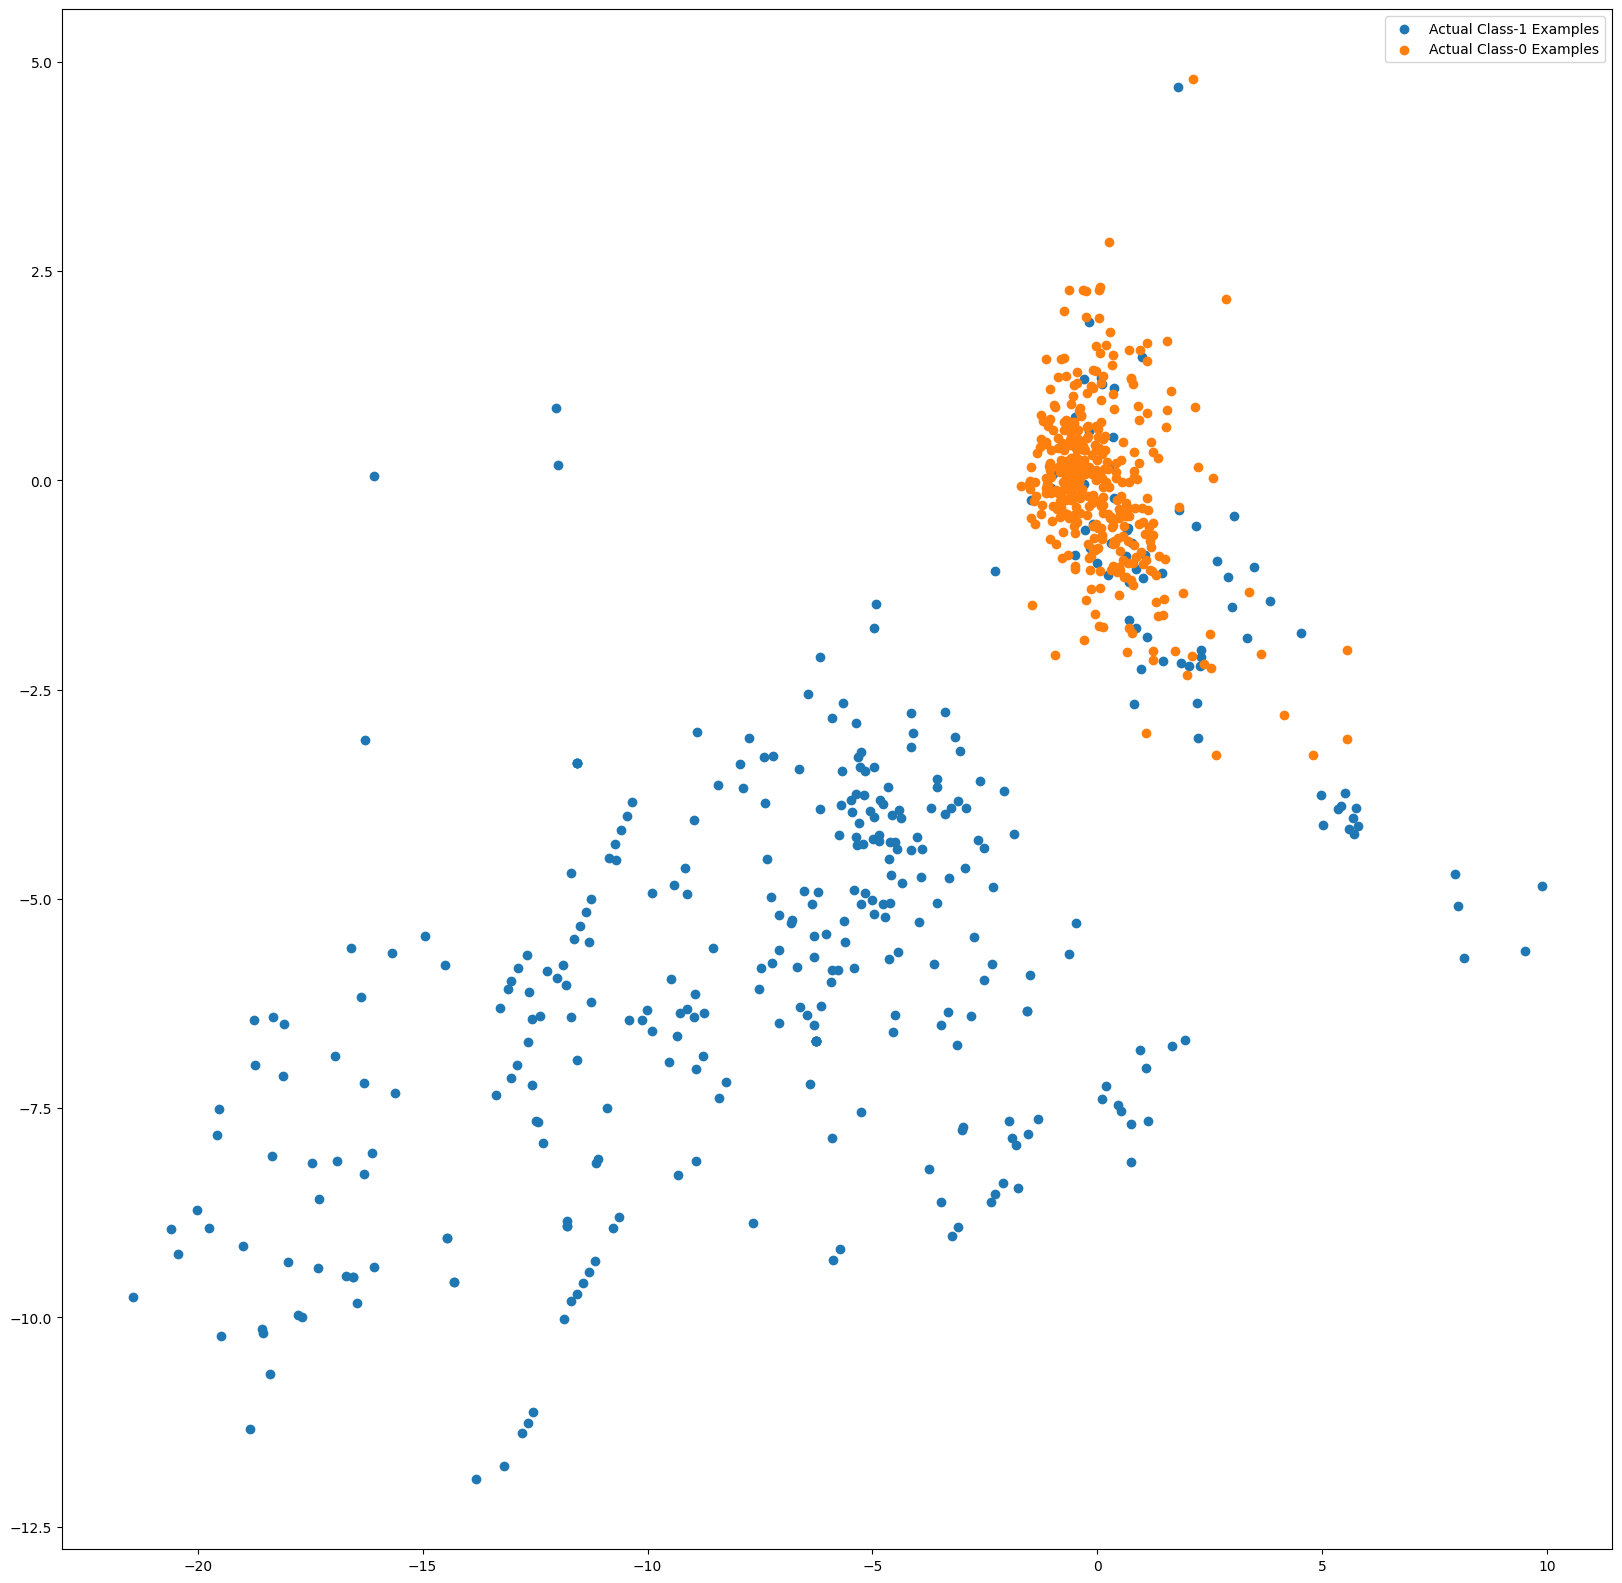

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

In [ ]:
# Uniform Oversampling Random Forest

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble

initial_trees = 600
num_trees = 700
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0, class_weight='balanced_subsample')
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 680
# Best auc corresponding to Best num_trees : 0.9809648649591679

num_trees = 600 ; auc = 0.9645113183922115 ; cv_num = 0
num_trees = 601 ; auc = 0.9644929602548042 ; cv_num = 0
num_trees = 602 ; auc = 0.9644716282135177 ; cv_num = 0
num_trees = 603 ; auc = 0.9644658519771372 ; cv_num = 0
num_trees = 604 ; auc = 0.9644308514160986 ; cv_num = 0
num_trees = 605 ; auc = 0.964412436088232 ; cv_num = 0
num_trees = 606 ; auc = 0.9643984244257249 ; cv_num = 0
num_trees = 607 ; auc = 0.964387443857556 ; cv_num = 0
num_trees = 608 ; auc = 0.9643910468564864 ; cv_num = 0
num_trees = 609 ; auc = 0.9643661690067289 ; cv_num = 0
num_trees = 610 ; auc = 0.9643534727247833 ; cv_num = 0
num_trees = 611 ; auc = 0.9643209313534911 ; cv_num = 0
num_trees = 612 ; auc = 0.9642956531705189 ; cv_num = 0
num_trees = 613 ; auc = 0.9642732345105072 ; cv_num = 0
num_trees = 614 ; auc = 0.9642395493300309 ; cv_num = 0
num_trees = 615 ; auc = 0.9642171878604785 ; cv_num = 0
num_trees = 616 ; auc = 0.9642007170082252 ; cv_num = 0
num_trees = 617 ; auc = 0.9641901939637298 ; cv_nu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Uniform Oversampling XGBoost
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier

num_depth = [3, 4, 5]
learning_rate = [0.09, 0.1, 0.11]
initial_trees = 2
num_trees = 500
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    weights = np.ones((y_train_cv.shape[0], 1))
    weights[np.where(y_train_cv==1.0)] = (y_train_cv.shape[0]-np.sum(y_train_cv))/np.sum(y_train_cv)
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =',
                  auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num], '; cv_num =', cv_num)
            for tree_id,tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =',
                      auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num],
                      '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(trees)*len(num_depth))
depth_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])
# Best Learning Rate: 0.09
# Best Depth: 4
# Best Trees: 99
# Best auc corresponding to Best Learning Rate, Depth & Trees : 0.978913709336831

Streaming output truncated to the last 5000 lines.
learning rate = 0.11 ; depth = 4 ; num_trees = 495 ; auc = 0.9836656613727746 ; cv_num = 1
learning rate = 0.11 ; depth = 4 ; num_trees = 496 ; auc = 0.9836286019552045 ; cv_num = 1
learning rate = 0.11 ; depth = 4 ; num_trees = 497 ; auc = 0.9835963465362084 ; cv_num = 1
learning rate = 0.11 ; depth = 4 ; num_trees = 498 ; auc = 0.9835443032183244 ; cv_num = 1
learning rate = 0.11 ; depth = 4 ; num_trees = 499 ; auc = 0.9835965752980452 ; cv_num = 1
learning rate = 0.11 ; depth = 4 ; num_trees = 500 ; auc = 0.9836773282264542 ; cv_num = 1
learning rate = 0.11 ; depth = 5 ; num_trees =  2 ; auc = 0.9466638345951264 ; cv_num = 1
learning rate = 0.11 ; depth = 5 ; num_trees = 3 ; auc = 0.9466663509753318 ; cv_num = 1
learning rate = 0.11 ; depth = 5 ; num_trees = 4 ; auc = 0.9466641777378817 ; cv_num = 1
learning rate = 0.11 ; depth = 5 ; num_trees = 5 ; auc = 0.9466710977834465 ; cv_num = 1
learning rate = 0.11 ; depth = 5 ; num_trees =

In [ ]:
# Random Oversampling Random Forest

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 2
num_trees = 1000
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ros = over_sampling.RandomOverSampler(random_state=0)
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 895
# Best auc corresponding to Best num_trees : 0.9797214831658256

num_trees = 2 ; auc = 0.9180027787700322 ; cv_num = 0
num_trees = 3 ; auc = 0.9260089283457305 ; cv_num = 0
num_trees = 4 ; auc = 0.9258255757334933 ; cv_num = 0
num_trees = 5 ; auc = 0.9256399926933468 ; cv_num = 0
num_trees = 6 ; auc = 0.9295477595809175 ; cv_num = 0
num_trees = 7 ; auc = 0.9293751015845532 ; cv_num = 0
num_trees = 8 ; auc = 0.9373209152257815 ; cv_num = 0
num_trees = 9 ; auc = 0.9371401933746683 ; cv_num = 0
num_trees = 10 ; auc = 0.9369844065637718 ; cv_num = 0
num_trees = 11 ; auc = 0.9368284481814977 ; cv_num = 0
num_trees = 12 ; auc = 0.9367475808721705 ; cv_num = 0
num_trees = 13 ; auc = 0.9367092060740385 ; cv_num = 0
num_trees = 14 ; auc = 0.9365808706835643 ; cv_num = 0
num_trees = 15 ; auc = 0.9365303715080792 ; cv_num = 0
num_trees = 16 ; auc = 0.9363888251215268 ; cv_num = 0
num_trees = 17 ; auc = 0.9362451626879836 ; cv_num = 0
num_trees = 18 ; auc = 0.9361756762800395 ; cv_num = 0
num_trees = 19 ; auc = 0.9360470549372695 ; cv_num = 0
num_trees = 20 ; a

In [ ]:
# Random Oversampling XGBoost

from xgboost import XGBClassifier
from imblearn import over_sampling

num_depth = [3, 4]
learning_rate = [0.11, 0.12]
initial_trees = 2
num_trees = 500
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ros = over_sampling.RandomOverSampler(random_state=0)
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =',
                  auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num], '; cv_num =', cv_num)
            for tree_id,tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =',
                      auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num],
                      '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(trees)*len(num_depth))
depth_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])
# Best Learning Rate: 0.11
# Best Depth: 4
# Best Trees: 229
# Best auc corresponding to Best Learning Rate, Depth & Trees : 0.9783530160712252

Streaming output truncated to the last 5000 lines.
learning rate = 0.11 ; depth = 4 ; num_trees = 495 ; auc = 0.9735776647008019 ; cv_num = 0
learning rate = 0.11 ; depth = 4 ; num_trees = 496 ; auc = 0.9735258501447548 ; cv_num = 0
learning rate = 0.11 ; depth = 4 ; num_trees = 497 ; auc = 0.973474378731463 ; cv_num = 0
learning rate = 0.11 ; depth = 4 ; num_trees = 498 ; auc = 0.973520016717915 ; cv_num = 0
learning rate = 0.11 ; depth = 4 ; num_trees = 499 ; auc = 0.9735383176648632 ; cv_num = 0
learning rate = 0.11 ; depth = 4 ; num_trees = 500 ; auc = 0.9735960800286684 ; cv_num = 0
learning rate = 0.12 ; depth = 3 ; num_trees =  2 ; auc = 0.9616809625657563 ; cv_num = 0
learning rate = 0.12 ; depth = 3 ; num_trees = 3 ; auc = 0.9626315823787961 ; cv_num = 0
learning rate = 0.12 ; depth = 3 ; num_trees = 4 ; auc = 0.9637324987186477 ; cv_num = 0
learning rate = 0.12 ; depth = 3 ; num_trees = 5 ; auc = 0.9638224021205308 ; cv_num = 0
learning rate = 0.12 ; depth = 3 ; num_trees = 6

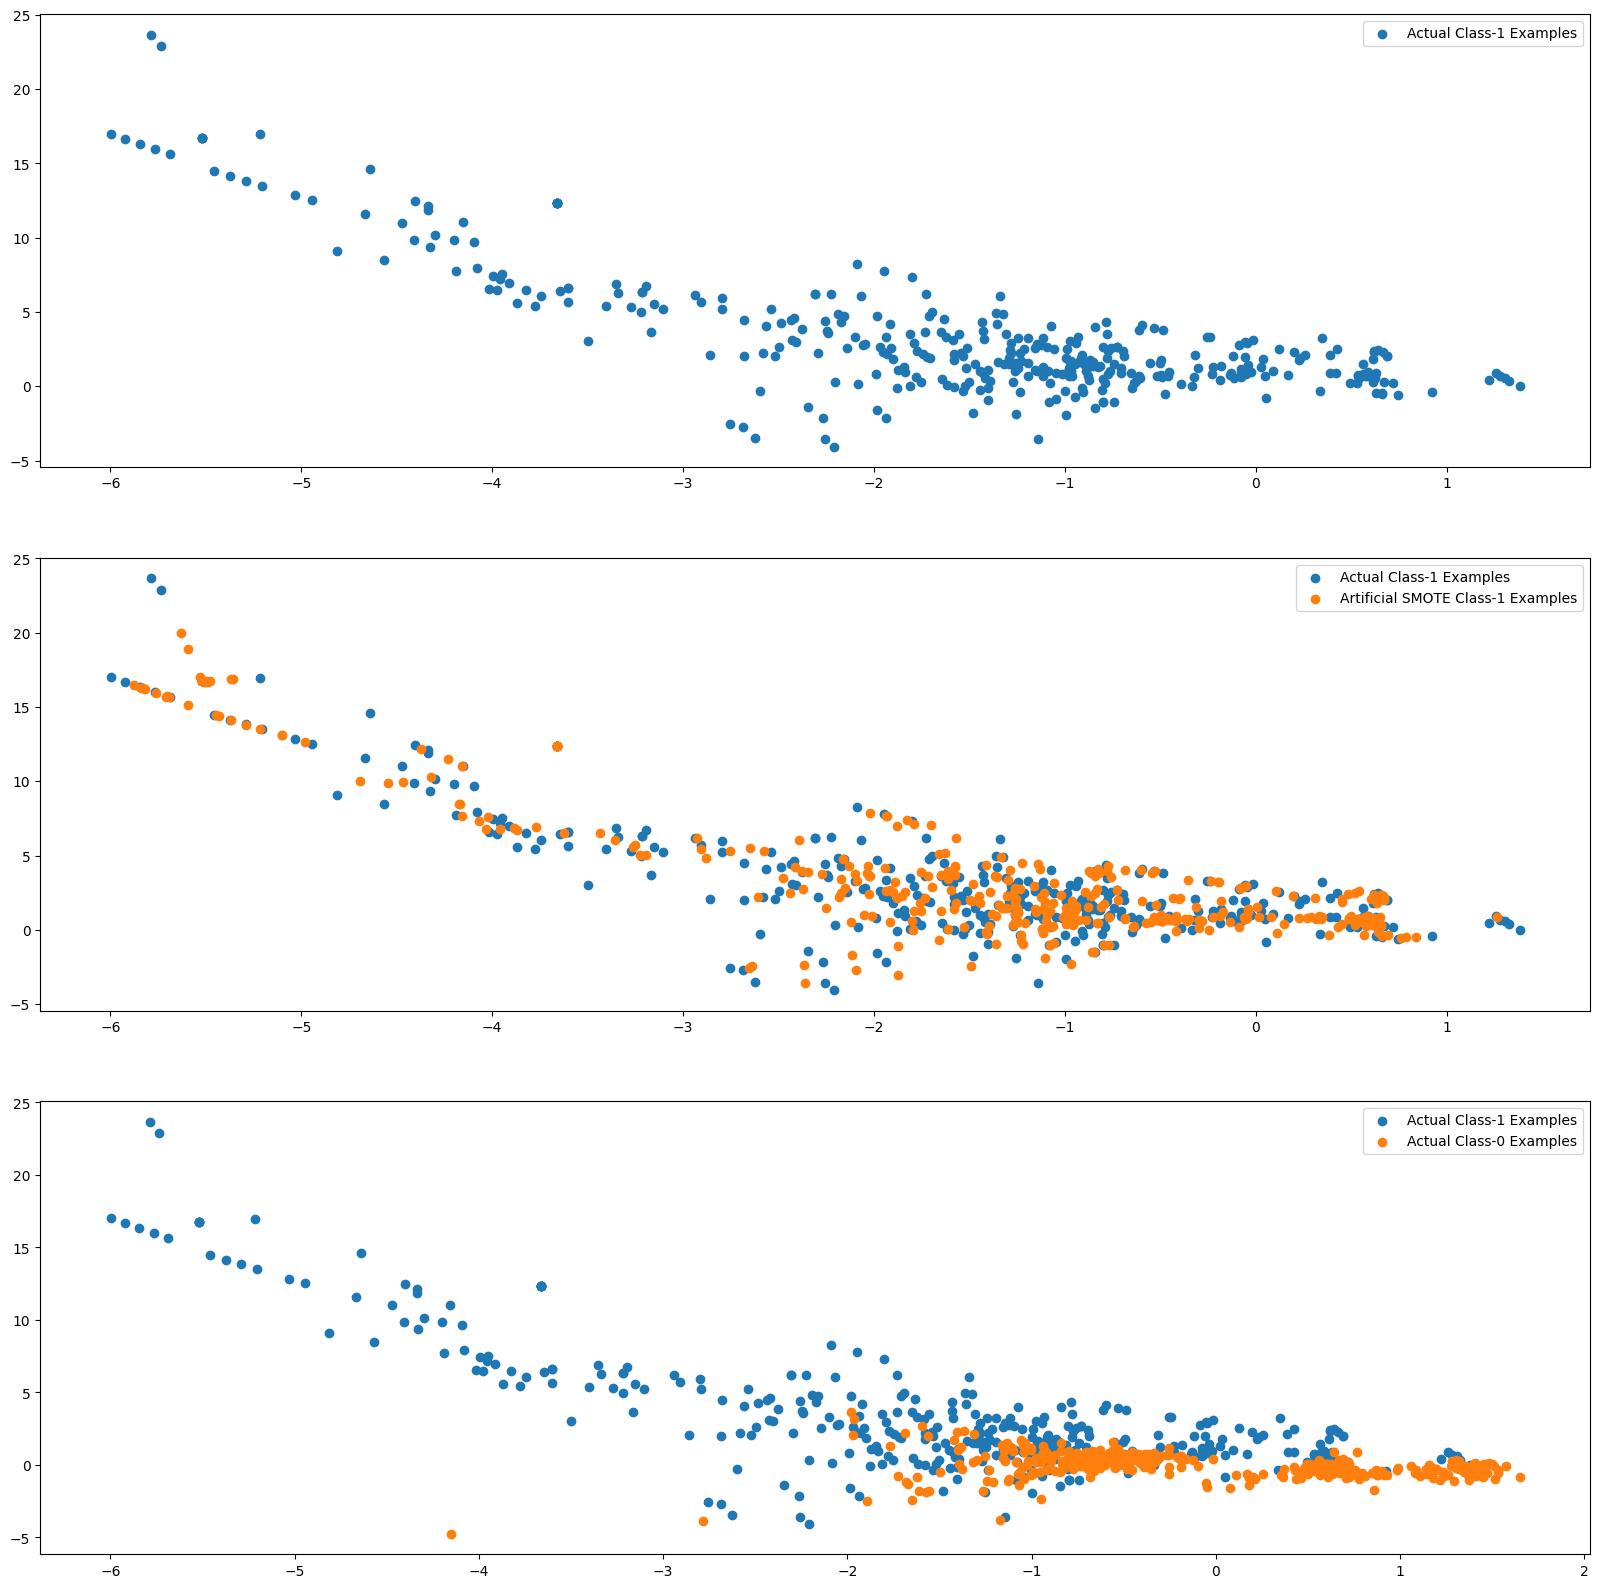

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# SMOTE Random Forest

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 750
num_trees = 1000
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    sm = over_sampling.SMOTE(random_state=0)
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 835
# Best auc corresponding to Best num_trees : 0.9830709752846448

num_trees = 750 ; auc = 0.9763248655995612 ; cv_num = 0
num_trees = 751 ; auc = 0.9763332154066064 ; cv_num = 0
num_trees = 752 ; auc = 0.9763214341720086 ; cv_num = 0
num_trees = 753 ; auc = 0.9763465979740623 ; cv_num = 0
num_trees = 754 ; auc = 0.9763292120744615 ; cv_num = 0
num_trees = 755 ; auc = 0.976312969984045 ; cv_num = 0
num_trees = 756 ; auc = 0.9763069077953683 ; cv_num = 0
num_trees = 757 ; auc = 0.976292838942402 ; cv_num = 0
num_trees = 758 ; auc = 0.9762849466590307 ; cv_num = 0
num_trees = 759 ; auc = 0.9762733941862696 ; cv_num = 0
num_trees = 760 ; auc = 0.9762563514294241 ; cv_num = 0
num_trees = 761 ; auc = 0.9762436551474788 ; cv_num = 0
num_trees = 762 ; auc = 0.9765984647564367 ; cv_num = 0
num_trees = 763 ; auc = 0.9765853109508178 ; cv_num = 0
num_trees = 764 ; auc = 0.9765806213331623 ; cv_num = 0
num_trees = 765 ; auc = 0.9765999517083763 ; cv_num = 0
num_trees = 766 ; auc = 0.9766626324516738 ; cv_num = 0
num_trees = 767 ; auc = 0.9766459328375835 ; cv_nu

In [20]:
# With the oversampling methods, SMOTE with Random Forest works best with AUC 0.9830709752846448

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, n_jobs=-1, random_state=0,
                                      n_estimators=918)
clf.fit(X_train_smote, y_train_smote)
print('Test auc =', metrics.roc_auc_score(y_true = y_test, y_score = clf.predict_proba(X_test)[:,1]))

# Final Test auc = 0.9854802574531465 !!

Test auc = 0.9854802574531465


Top var = 14
2nd Top var = 10
3rd Top var = 17


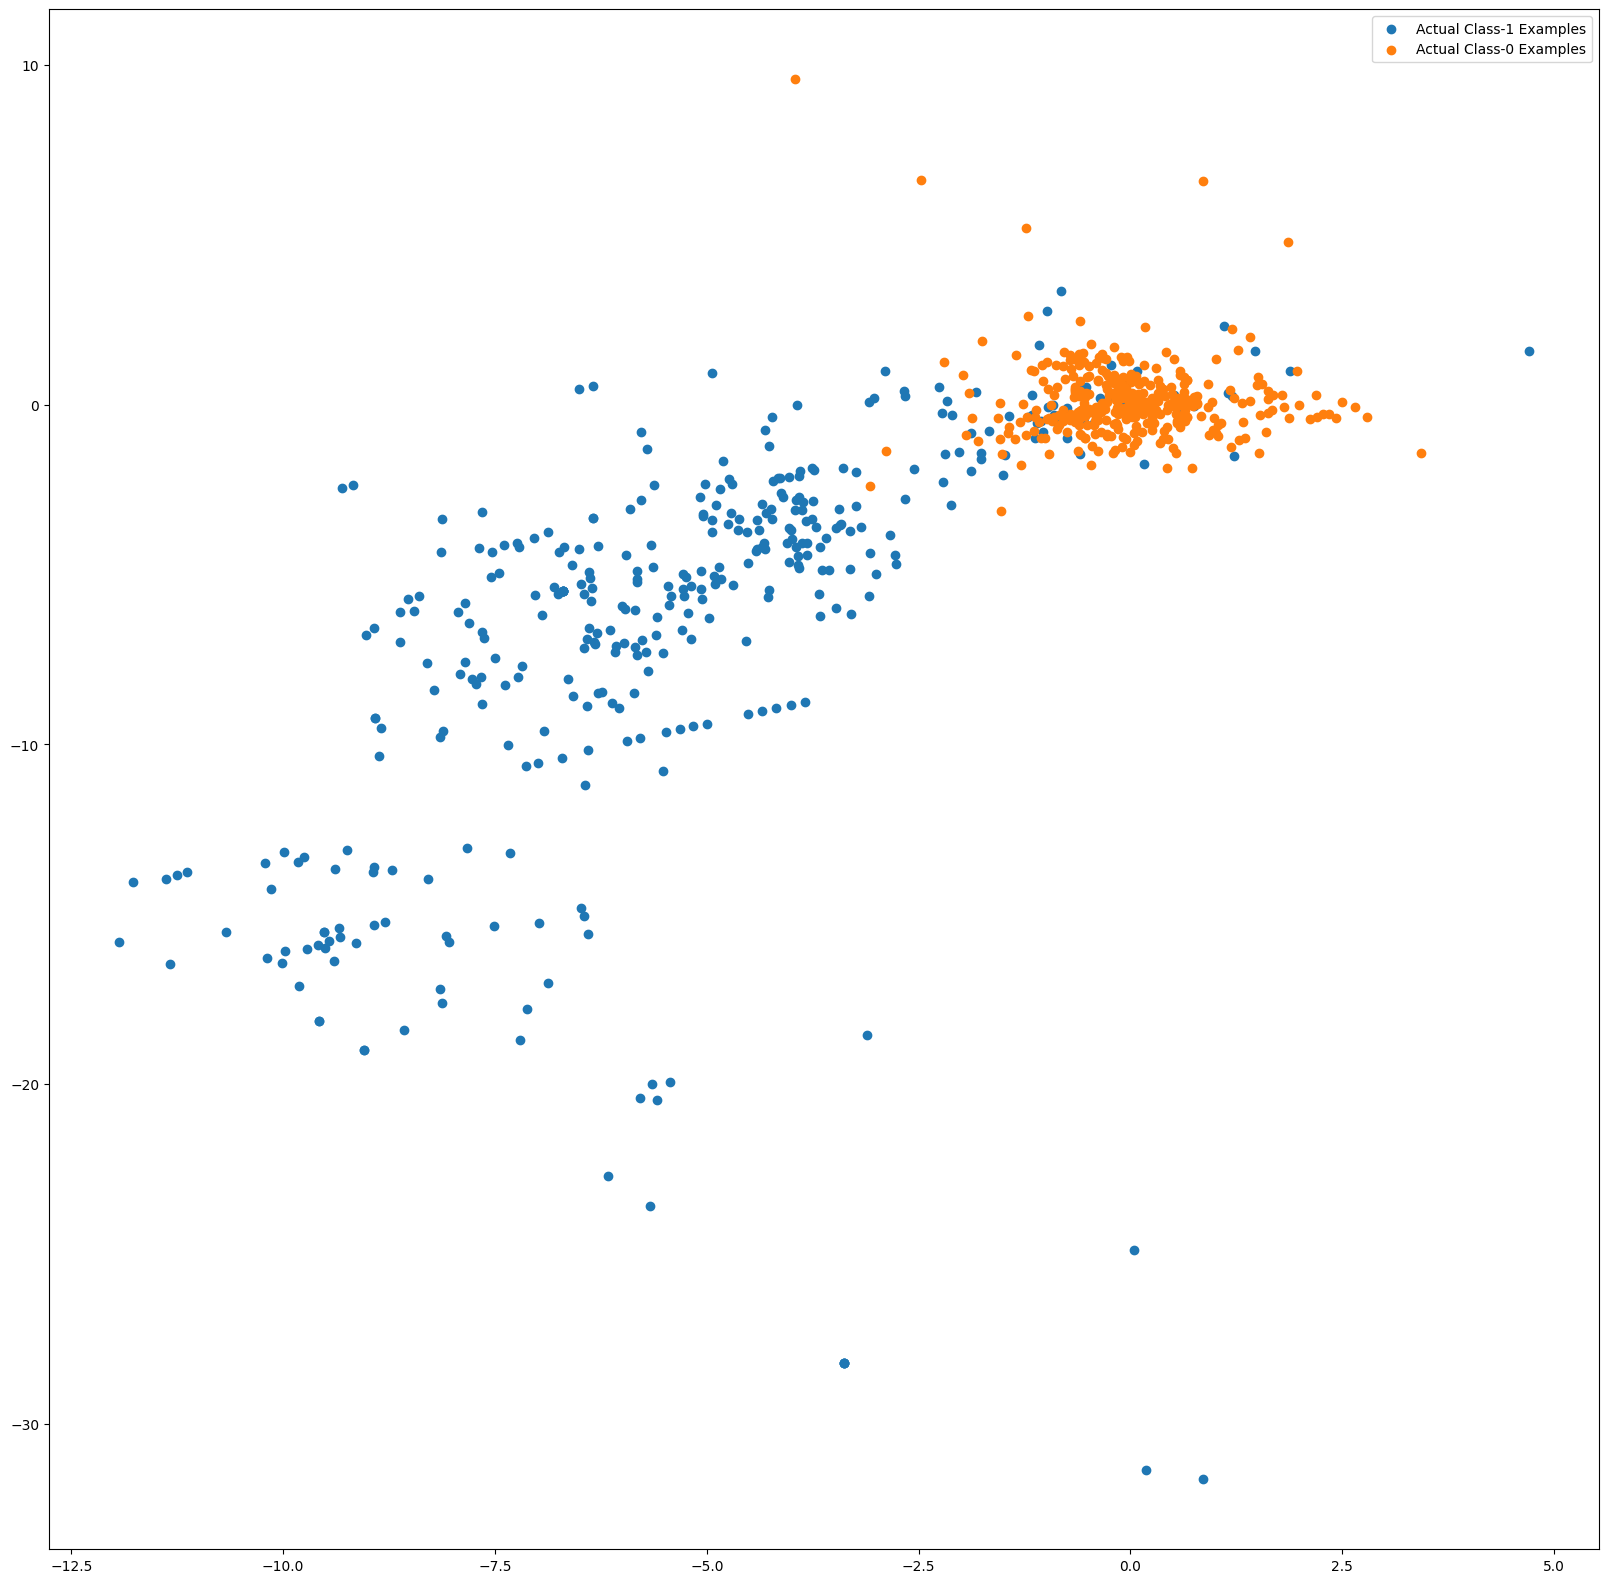

In [21]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [22]:
##### print('Train auc =', metrics.roc_auc_score(y_true = y_train_smote, y_score = clf.predict_proba(X_train_smote)[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, clf.predict_proba(X_train_smote)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.584999074495035


In [23]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [17]:
# prompt: export df in csv and save at path = /content/drive/MyDrive/Python/ML/

df.to_csv('/content/drive/MyDrive/Python/ML/df.csv')
